# Regresion Lineal

## 1. Conjunto de datos

In [2]:
import numpy as np
X = np.linspace(0,10,100)
Y = 2*X + 5
Y += np.random.normal(0.0, 1.0, size = 100)

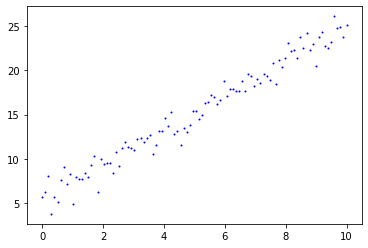

In [3]:
# Graficamos
import matplotlib.pyplot as plt
plt.scatter(X,Y,1,'b')
plt.show()

## 2. Regresion Lineal desde cero

In [4]:
# Funcion de costo
def loss(theta):
  l = 0.0
  for i in range(100):
    l += np.square(theta[0] + theta[1]*X[i] - Y[i]) 
  return 0.5*l

In [5]:
# Gradiente
def jacobian(theta):
  g = np.zeros(shape = 2)
  for i in range(100):
    g[0] +=  (theta[0] + theta[1]*X[i] - Y[i]) 
    g[1] +=  (theta[0] + theta[1]*X[i] - Y[i])*X[i]
  return g

In [7]:
# Optimizamos
from scipy.optimize import minimize
resultado = minimize(fun=loss, x0 = [0.0, 0.0], jac = jacobian, method='BFGS')

In [8]:
resultado.x

array([5.365254  , 1.96004867])

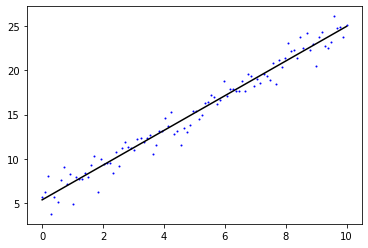

In [9]:
# Graficamos
m, b = resultado.x[1], resultado.x[0]
plt.plot([0, 10],[b, 10*m+b],'k')
plt.scatter(X,Y,1,'b')
plt.show()

In [16]:
# Metodo vectorial
Xm = np.expand_dims(X,axis=1)
Ym = np.expand_dims(X,axis=1)
print(Xm.shape)

(100, 1)


In [17]:
print(Xm[0:5])

[[0.       ]
 [0.1010101]
 [0.2020202]
 [0.3030303]
 [0.4040404]]


In [18]:
Xm = np.concatenate((np.ones_like(Xm),Xm), axis=1)

In [19]:
print(Xm[0:5])

[[1.        0.       ]
 [1.        0.1010101]
 [1.        0.2020202]
 [1.        0.3030303]
 [1.        0.4040404]]


In [20]:
theta = np.linalg.inv(np.dot(Xm.T,Xm)).dot(Xm.T).dot(Y)

In [21]:
print(theta)

[5.365254   1.96004867]


## 3. Regresion Lineal con Scikit

In [22]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [24]:
type(dataset)

sklearn.utils.Bunch

In [25]:
X = dataset.data
Y = dataset.target

In [26]:
print("X:",X.shape,"Y:",Y.shape)

X: (442, 10) Y: (442,)


Modelo de regresion lineal

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr.fit(X,Y)

LinearRegression()

In [29]:
# Coeficientes
print('Coeficientes:',lr.coef_)
print('Bias:',lr.intercept_)

Coeficientes: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Bias: 152.1334841628965


In [30]:
lr.score(X,Y)

0.5177494254132934